In [ ]:
# Discard the output of this cell.
#%%capture

# Install the required libraries.
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/TahaAnwar/pafy.git to /tmp/pip-install-q7b5w5pk/pafy_9bd2b1fbed714db3aec012d26e7c6d0b
  Running command git clone -q https://github.com/TahaAnwar/pafy.git /tmp/pip-install-q7b5w5pk/pafy_9bd2b1fbed714db3aec012d26e7c6d0b
  Created wheel for pafy: filename=pafy-0.5.5-py2.py3-none-any.whl size=35706 sha256=d9bf46ec4ca041fd9380ae7412dea2dc3b70783edf47c88eb58796673ba36596
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2bfz5o3/wheels/64/82/dd/3d7823b3bbbe1aca9b30f8cf0d6bb6c1b72ccd95e3360f8190
Successfully built pafy


In [2]:
# Import the required libraries.
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

# from moviepy.editor import *
# import moviepy.editor
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.4.1.50-1+cuda11.6
  Candidate: 8.6.0.163-1+cuda11.8
  Version table:
     8.6.0.163-1+cuda11.8 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.6.0.163-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
 *** 8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
        100 /var/lib/dpkg/status
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_6

In [ ]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/a1_93_97.zip

Archive:  /content/drive/MyDrive/a1_93_97.zip
   creating: a1_93_97/anomaly/
  inflating: a1_93_97/anomaly/a1.mp4  
  inflating: a1_93_97/anomaly/a10_1.mp4  
  inflating: a1_93_97/anomaly/a10_2.mp4  
  inflating: a1_93_97/anomaly/a10_3.mp4  
  inflating: a1_93_97/anomaly/a11_1.mp4  
  inflating: a1_93_97/anomaly/a11_2.mp4  
  inflating: a1_93_97/anomaly/a11_3.mp4  
  inflating: a1_93_97/anomaly/a12_1.mp4  
  inflating: a1_93_97/anomaly/a12_2.mp4  
  inflating: a1_93_97/anomaly/a12_3.mp4  
  inflating: a1_93_97/anomaly/a13_1.mp4  
  inflating: a1_93_97/anomaly/a13_2.mp4  
  inflating: a1_93_97/anomaly/a13_3.mp4  
  inflating: a1_93_97/anomaly/a14_1.mp4  
  inflating: a1_93_97/anomaly/a14_2.mp4  
  inflating: a1_93_97/anomaly/a15_1.mp4  
  inflating: a1_93_97/anomaly/a15_2.mp4  
  inflating: a1_93_97/anomaly/a15_3.mp4  
  inflating: a1_93_97/anomaly/a15_4.mp4  
  inflating: a1_93_97/anomaly/a16_1.mp4  
  inflating: a1_93_97/anomaly/a17.mp4  
  inflating: a1_93_97/anomaly/a18.mp4  
  infl

In [ ]:
!unzip /content/drive/MyDrive/A1_dataset.zip

Archive:  /content/drive/MyDrive/A1_dataset.zip
   creating: A1_dataset/Climbing/
  inflating: A1_dataset/Climbing/Climbing 1.2.mp4  
  inflating: A1_dataset/Climbing/Climbing 1.3.mp4  
  inflating: A1_dataset/Climbing/Climbing 1.4.mp4  
  inflating: A1_dataset/Climbing/Climbing 1.5.mp4  
  inflating: A1_dataset/Climbing/Climbing 1.6.mp4  
  inflating: A1_dataset/Climbing/Climbing 1.7.mp4  
  inflating: A1_dataset/Climbing/Climbing 2.3.mp4  
  inflating: A1_dataset/Climbing/climbing 3.1.mp4  
  inflating: A1_dataset/Climbing/climbing 3.2.mp4  
  inflating: A1_dataset/Climbing/climbing 3.3.mp4  
  inflating: A1_dataset/Climbing/Climbing 4.1.mp4  
   creating: A1_dataset/Hitting_on_Fence/
  inflating: A1_dataset/Hitting_on_Fence/VID_20220326133420.mp4  
  inflating: A1_dataset/Hitting_on_Fence/VID-20220323-WA0021.mp4  
  inflating: A1_dataset/Hitting_on_Fence/VID-20220323-WA0032.mp4  
  inflating: A1_dataset/Hitting_on_Fence/VID20220326112821.mp4  
  inflating: A1_dataset/Hitting_on_Fenc

In [ ]:
!unzip /content/drive/MyDrive/A1_new_data.zip

Archive:  /content/drive/MyDrive/A1_new_data.zip
   creating: A1_new_data/anomaly/
  inflating: A1_new_data/anomaly/a1.mp4  
  inflating: A1_new_data/anomaly/a10.mp4  
  inflating: A1_new_data/anomaly/a11.mp4  
  inflating: A1_new_data/anomaly/a12.mp4  
  inflating: A1_new_data/anomaly/a13.mp4  
  inflating: A1_new_data/anomaly/a14.mp4  
  inflating: A1_new_data/anomaly/a15.mp4  
  inflating: A1_new_data/anomaly/a16.mp4  
  inflating: A1_new_data/anomaly/a17.mp4  
  inflating: A1_new_data/anomaly/a18.mp4  
  inflating: A1_new_data/anomaly/a19.mp4  
  inflating: A1_new_data/anomaly/a2.mp4  
  inflating: A1_new_data/anomaly/a20.mp4  
  inflating: A1_new_data/anomaly/a21.mp4  
  inflating: A1_new_data/anomaly/a22.mp4  
  inflating: A1_new_data/anomaly/a23.mp4  
  inflating: A1_new_data/anomaly/a3.mp4  
  inflating: A1_new_data/anomaly/a4.mp4  
  inflating: A1_new_data/anomaly/a5.mp4  
  inflating: A1_new_data/anomaly/a6.mp4  
  inflating: A1_new_data/anomaly/a7.mp4  
  inflating: A1_new_d

In [ ]:
# # %%capture

# !wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar

# !unrar x UCF50.rar

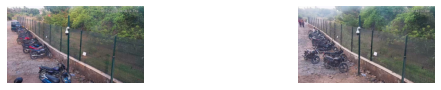

In [ ]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('a1_93_97')

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 2)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'a1_93_97/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'a1_93_97/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(12, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [4]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Specify the directory containing the UCF50 dataset. 
DATASET_DIR = "/content/a1_93_97"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
# CLASSES_LIST = ["Climbing", "Hitting_on_Fence", "Ladder_climbing", "Moving_around_fence", "Normal_walking", "Running"]
CLASSES_LIST = ["anomaly", "non_anomaly"]

In [ ]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

In [ ]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [ ]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: anomaly
Extracting Data of Class: non_anomaly


In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.2, shuffle = True,
                                                                            random_state = seed_constant)

In [ ]:
features.shape

(190, 20, 64, 64, 3)

In [1]:
def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''

    # We will use a Sequential model for model construction
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(tf.keras.layers.ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(tf.keras.layers.MaxPool3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
    
    model.add(tf.keras.layers.ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(tf.keras.layers.MaxPool3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
    
    model.add(tf.keras.layers.ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(tf.keras.layers.MaxPool3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
    
    model.add(tf.keras.layers.ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(tf.keras.layers.MaxPool3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(tf.keras.layers.Flatten()) 
    
    model.add(tf.keras.layers.Dense(len(CLASSES_LIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model

In [5]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()

# Display the success message. 
print("Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 31, 31, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 20, 31, 31, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 15, 15, 8)    0         
 3D)                                                             
                                                      

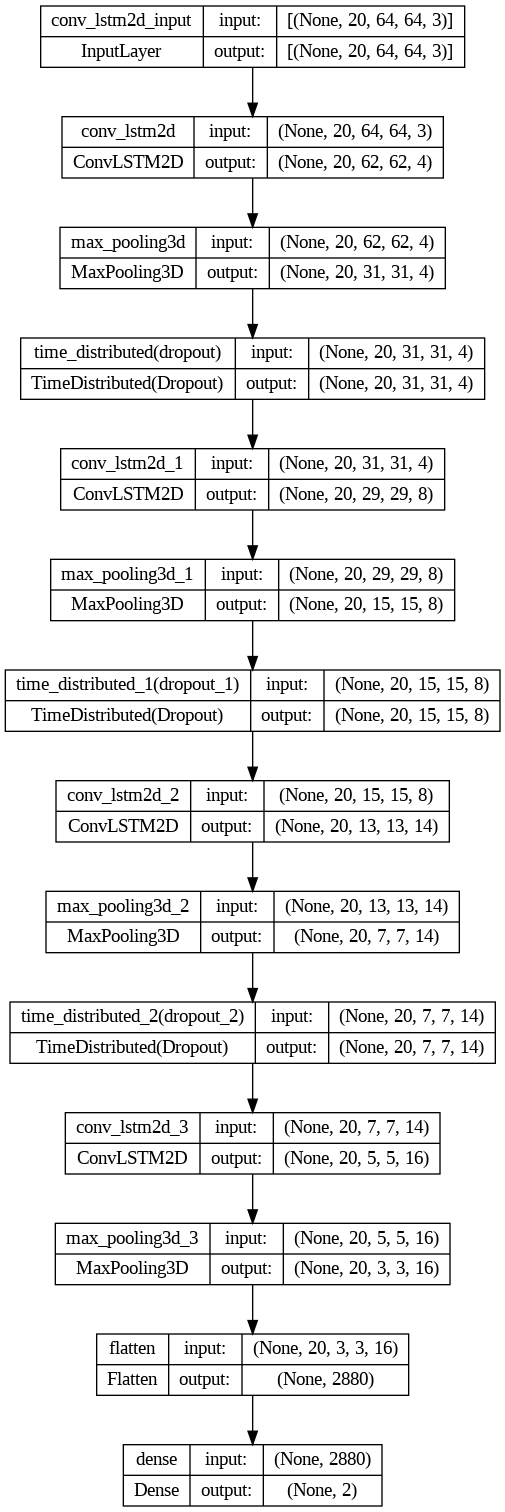

In [6]:
# # Plot the structure of the contructed model.
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

In [ ]:
# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = "accuracy")

In [ ]:
# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks = early_stopping_callback)

Epoch 1/50
31/31 [==============================] - 39s 622ms/step - loss: 0.7026 - accuracy: 0.5207 - val_loss: 0.7147 - val_accuracy: 0.3871
Epoch 2/50
31/31 [==============================] - 17s 554ms/step - loss: 0.6955 - accuracy: 0.5207 - val_loss: 0.6953 - val_accuracy: 0.3871
Epoch 3/50
31/31 [==============================] - 19s 611ms/step - loss: 0.6913 - accuracy: 0.5372 - val_loss: 0.6796 - val_accuracy: 0.8065
Epoch 4/50
31/31 [==============================] - 17s 550ms/step - loss: 0.6600 - accuracy: 0.7190 - val_loss: 0.6517 - val_accuracy: 0.6129
Epoch 5/50
31/31 [==============================] - 17s 544ms/step - loss: 0.6158 - accuracy: 0.6942 - val_loss: 0.5972 - val_accuracy: 0.7097
Epoch 6/50
31/31 [==============================] - 17s 543ms/step - loss: 0.4242 - accuracy: 0.8017 - val_loss: 0.3992 - val_accuracy: 0.7742
Epoch 7/50
31/31 [==============================] - 17s 540ms/step - loss: 0.3090 - accuracy: 0.8347 - val_loss: 0.5445 - val_accuracy: 0.7742

In [ ]:
# Evaluate the trained model.
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 157ms/step - loss: 0.2913 - accuracy: 0.8421


In [ ]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
convlstm_model.save(model_file_name)

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

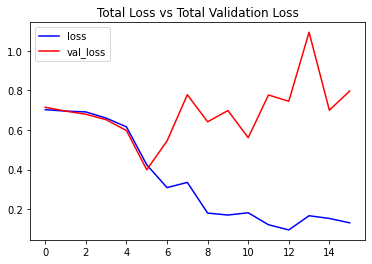

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

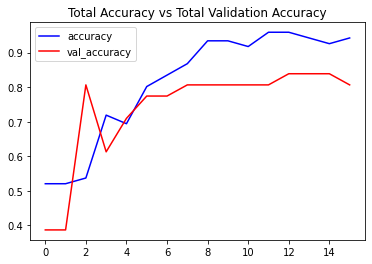

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [7]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))
    
    # model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    # model.add(TimeDistributed(MaxPooling2D((2, 2))))
    # model.add(TimeDistributed(Dropout(0.2)))

    # model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
    # model.add(TimeDistributed(MaxPooling2D((2, 2))))
    # model.add(TimeDistributed(Dropout(0.2)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [8]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 20, 64, 64, 16)   448       
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 20, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 20, 4, 4, 32)    

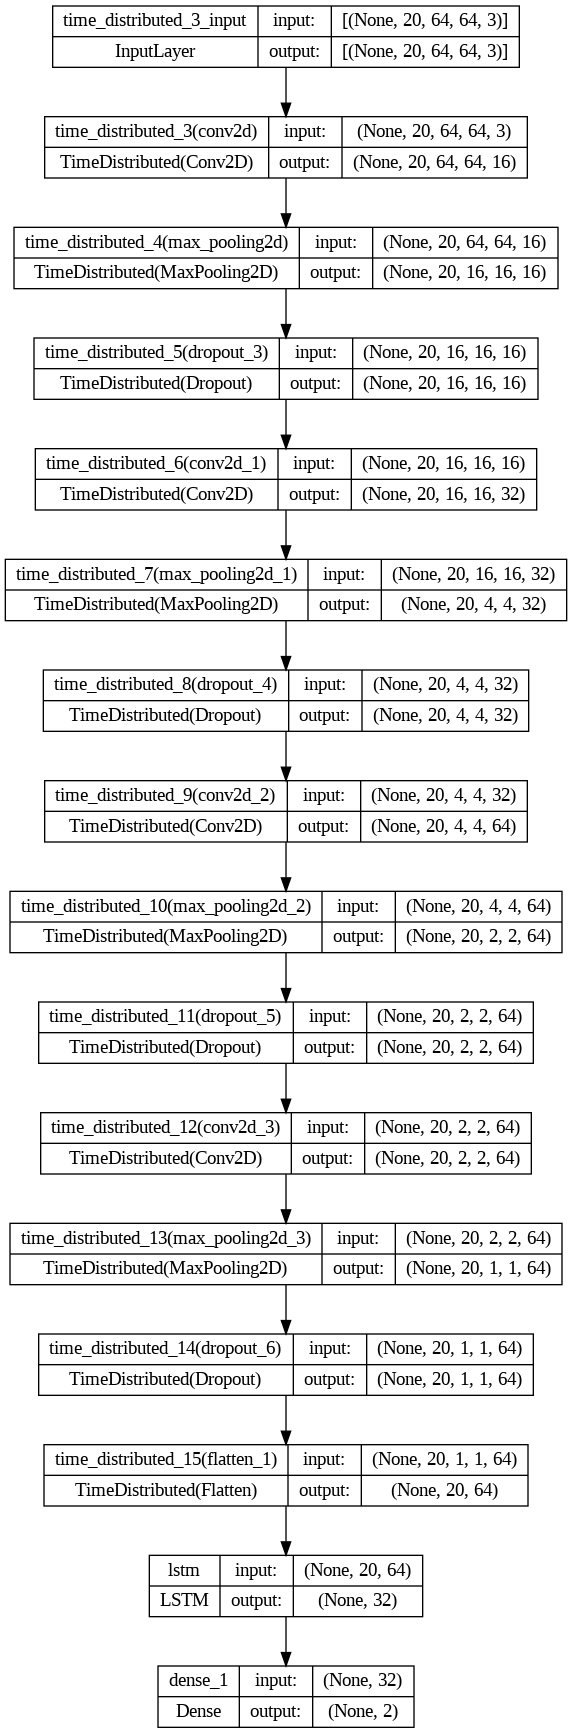

In [9]:
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

#, callbacks = [early_stopping_callback]

Epoch 1/30
31/31 [==============================] - 4s 36ms/step - loss: 0.7289 - accuracy: 0.4628 - val_loss: 0.6907 - val_accuracy: 0.6129
Epoch 2/30
31/31 [==============================] - 0s 11ms/step - loss: 0.6917 - accuracy: 0.5289 - val_loss: 0.6997 - val_accuracy: 0.3871
Epoch 3/30
31/31 [==============================] - 0s 12ms/step - loss: 0.6977 - accuracy: 0.5207 - val_loss: 0.6956 - val_accuracy: 0.3871
Epoch 4/30
31/31 [==============================] - 0s 11ms/step - loss: 0.6900 - accuracy: 0.5372 - val_loss: 0.6914 - val_accuracy: 0.3871
Epoch 5/30
31/31 [==============================] - 0s 10ms/step - loss: 0.6813 - accuracy: 0.5207 - val_loss: 0.6936 - val_accuracy: 0.3871
Epoch 6/30
31/31 [==============================] - 0s 11ms/step - loss: 0.6853 - accuracy: 0.5455 - val_loss: 0.6642 - val_accuracy: 0.6452
Epoch 7/30
31/31 [==============================] - 0s 11ms/step - loss: 0.6315 - accuracy: 0.6612 - val_loss: 0.5870 - val_accuracy: 0.7419
Epoch 8/30
31

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 84ms/step - loss: 0.1375 - accuracy: 0.9474


In [ ]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save(model_file_name)

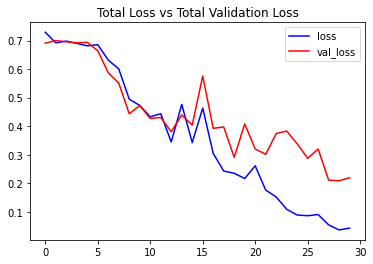

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

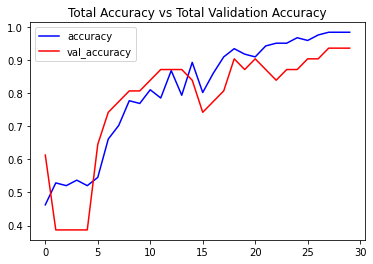

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
def download_youtube_videos(youtube_video_url, output_directory):
     '''
    This function downloads the youtube video whose URL is passed to it as an argument.
    Args:
        youtube_video_url: URL of the video that is required to be downloaded.
        output_directory:  The directory path to which the video needs to be stored after downloading.
    Returns:
        title: The title of the downloaded youtube video.
    '''
 
     # Create a video object which contains useful information about the video.
     video = pafy.new(youtube_video_url)
 
     # Retrieve the title of the video.
     title = video.title
 
     # Get the best available quality object for the video.
     video_best = video.getbest()
 
     # Construct the output file path.
     output_file_path = f'{output_directory}/{title}.mp4'
 
     # Download the youtube video at the best available quality and store it to the contructed path.
     video_best.download(filepath = output_file_path, quiet = True)
 
     # Return the video title.
     return title

In [ ]:
import pafy

# Make the Output directory if it does not exist
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)

# Download a YouTube Video.
video_title = download_youtube_videos('https://www.youtube.com/watch?v=IljyXNuHeoI', test_videos_directory)

# Get the YouTube Video's path we just downloaded.
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

In [ ]:
convlstm_model.load_weights('/content/convlstm_model_20sequence_length__Date_Time_2022_09_06__10_54_14___Loss_0.00011336002353345975___Accuracy_1.0_.h5')

In [ ]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'),
                                   video_reader.get(cv2.CAP_PROP_FPS),(original_video_width, original_video_height))
     

    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():

        # Read the frame.
        ok, frame = video_reader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not ok:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255

        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)

        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:

            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = convlstm_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

            # Get the index of class with highest probability.
            # if max(predicted_labels_probabilities)>0.5:
            predicted_label = np.argmax(predicted_labels_probabilities)
            print('predicted label = ',predicted_label)
            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]
        # Write predicted class name on top of the frame.
            cv2.putText(frame, predicted_class_name + " " + str(max(predicted_labels_probabilities)), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write The frame into the disk using the VideoWriter Object.
        video_writer.write(frame)
        
    # Release the VideoCapture and VideoWriter objects.
    video_reader.release()
    video_writer.release()

In [ ]:
# Construct the output video path.
output_video_file_path = 'mix_pred.mp4'

# Perform Action Recognition on the Test Video. 
predict_on_video('/content/drive/MyDrive/mix.mp4', output_video_file_path, SEQUENCE_LENGTH)

# Display the output video.
# VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted label =  1
predicted lab

In [ ]:
from google.colab import files
files.download("na_mergepred.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("mix_pred.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !ffmpeg -i '/content/Climbing_output_1.mp4' metadata:s:v

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
# !ffmpeg -i '/content/ladder_climbing_output.mp4' -metadata:s:v rotate="-180" -codec copy ladder_climbing_output_ro.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
!nvidia-smi

Mon Aug 29 07:54:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    28W /  70W |   1032MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# def predict_single_action(video_file_path, SEQUENCE_LENGTH):
#     '''
#     This function will perform single action recognition prediction on a video using the LRCN model.
#     Args:
#     video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
#     SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
#     '''

#     # Initialize the VideoCapture object to read from the video file.
#     video_reader = cv2.VideoCapture(video_file_path)

#     # Get the width and height of the video.
#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     # Declare a list to store video frames we will extract.
#     frames_list = []
    
#     # Initialize a variable to store the predicted action being performed in the video.
#     predicted_class_name = ''

#     # Get the number of frames in the video.
#     video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

#     # Calculate the interval after which frames will be added to the list.
#     skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

#     # Iterating the number of times equal to the fixed length of sequence.
#     for frame_counter in range(SEQUENCE_LENGTH):

#         # Set the current frame position of the video.
#         video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

#         # Read a frame.
#         success, frame = video_reader.read() 

#         # Check if frame is not read properly then break the loop.
#         if not success:
#             break

#         # Resize the Frame to fixed Dimensions.
#         resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
#         # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
#         normalized_frame = resized_frame / 255
        
#         # Appending the pre-processed frame into the frames list
#         frames_list.append(normalized_frame)

#     # Passing the  pre-processed frames to the model and get the predicted probabilities.
#     predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_list, axis = 0))[0]

#     # Get the index of class with highest probability.
#     predicted_label = np.argmax(predicted_labels_probabilities)

#     # Get the class name using the retrieved index.
#     predicted_class_name = CLASSES_LIST[predicted_label]
    
#     # Display the predicted action along with the prediction confidence.
#     print(f'Action Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
#     # Release the VideoCapture object. 
#     video_reader.release()

In [ ]:
# # Download the youtube video.
# video_title = download_youtube_videos('https://youtu.be/fc3w827kwyA', test_videos_directory)

# # Construct tihe nput youtube video path
# input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

# # Perform Single Prediction on the Test Video.
# predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

# # Display the input video.
# VideoFileClip(input_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()